In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [28]:
df = pd.read_csv("/content/phone_usage_india.csv")

In [16]:
df.head()

,User ID,Age,Gender,Location,Phone Brand,OS,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR),Primary Use
0,U00001,53,Male,Mumbai,Vivo,Android,3.7,23.9,37.9,104,3.9,469,5.2,4.1,803,Education
1,U00002,60,Other,Delhi,Realme,iOS,9.2,28.1,13.7,169,2.8,4997,5.1,0.4,1526,Gaming
2,U00003,37,Female,Ahmedabad,Nokia,Android,4.5,12.3,66.8,96,3.0,2381,1.7,2.9,1619,Entertainment
3,U00004,32,Male,Pune,Samsung,Android,11.0,25.6,156.2,146,5.2,1185,3.2,0.3,1560,Entertainment
4,U00005,16,Male,Mumbai,Xiaomi,iOS,2.2,2.5,236.2,86,5.5,106,3.4,2.3,742,Social Media


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User ID                       17686 non-null  object 
 1   Age                           17686 non-null  int64  
 2   Gender                        17686 non-null  object 
 3   Location                      17686 non-null  object 
 4   Phone Brand                   17686 non-null  object 
 5   OS                            17686 non-null  object 
 6   Screen Time (hrs/day)         17686 non-null  float64
 7   Data Usage (GB/month)         17686 non-null  float64
 8   Calls Duration (mins/day)     17686 non-null  float64
 9   Number of Apps Installed      17686 non-null  int64  
 10  Social Media Time (hrs/day)   17686 non-null  float64
 11  E-commerce Spend (INR/month)  17686 non-null  int64  
 12  Streaming Time (hrs/day)      17686 non-null  float64
 13  G

In [18]:
df.describe()

,Age,Screen Time (hrs/day),Data Usage (GB/month),Calls Duration (mins/day),Number of Apps Installed,Social Media Time (hrs/day),E-commerce Spend (INR/month),Streaming Time (hrs/day),Gaming Time (hrs/day),Monthly Recharge Cost (INR)
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,37.584247,6.546376,25.411257,151.405846,104.584869,3.252369,5075.707848,4.250616,2.490874,1042.785367
std,13.338252,3.172677,14.122167,84.923353,55.217097,1.590223,2871.604841,2.155683,1.446003,552.502067
min,15.000000,1.000000,1.000000,5.000000,10.000000,0.500000,100.000000,0.500000,0.000000,100.000000
25%,26.000000,3.800000,13.200000,77.325000,57.000000,1.900000,2587.500000,2.400000,1.200000,561.000000
50%,38.000000,6.600000,25.300000,150.600000,104.000000,3.200000,5052.000000,4.200000,2.500000,1040.000000
75%,49.000000,9.300000,37.600000,223.900000,152.000000,4.600000,7606.000000,6.100000,3.700000,1521.750000
max,60.000000,12.000000,50.000000,300.000000,200.000000,6.000000,10000.000000,8.000000,5.000000,2000.000000


In [19]:
df.isna().sum()

,0
User ID,0
Age,0
Gender,0
Location,0
Phone Brand,0
OS,0
Screen Time (hrs/day),0
Data Usage (GB/month),0
Calls Duration (mins/day),0
Number of Apps Installed,0


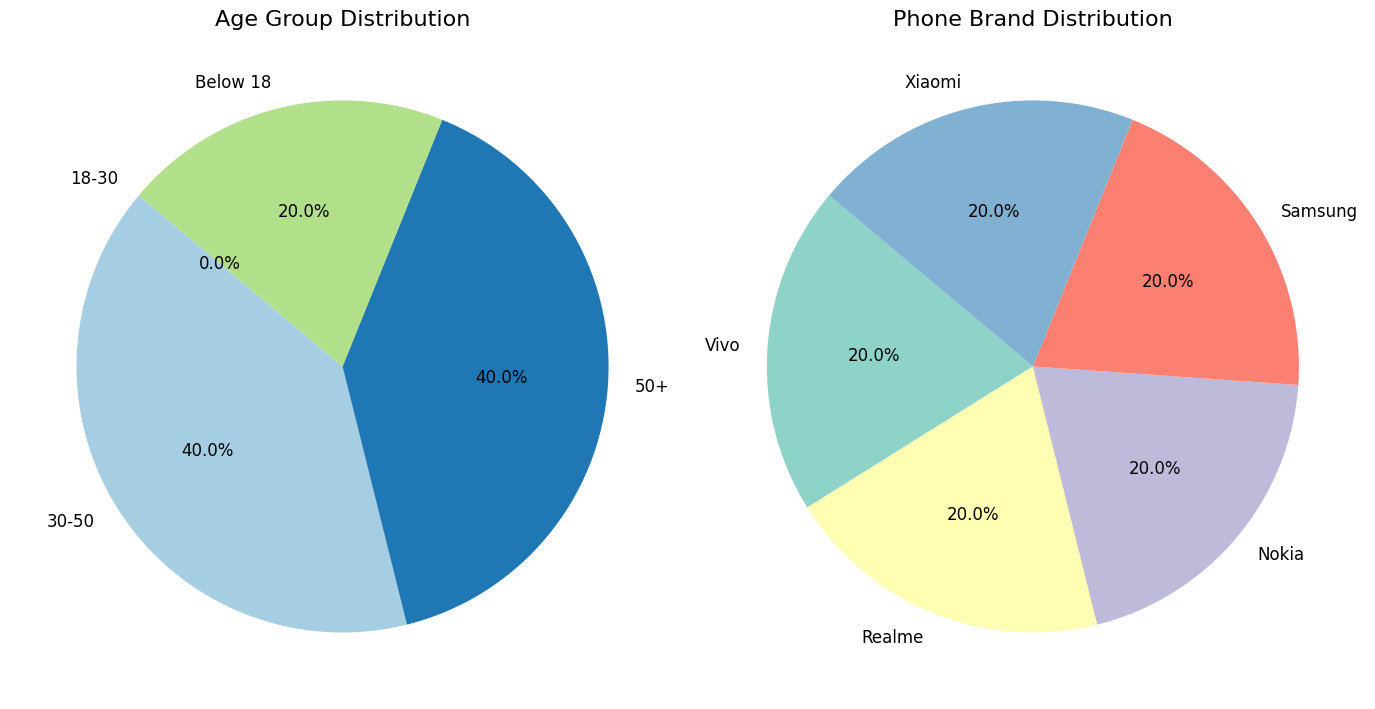

In [20]:

# Sample dataset
data = {
    "Age": [53, 60, 37, 32, 16],
    "Phone Brand": ["Vivo", "Realme", "Nokia", "Samsung", "Xiaomi"]
}
df = pd.DataFrame(data)

# Categorize Age into groups
age_bins = [0, 18, 30, 50, 100]  # Define age ranges
age_labels = ["Below 18", "18-30", "30-50", "50+"]  # Labels for the bins
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences in each category
age_group_counts = df["Age Group"].value_counts()
brand_counts = df["Phone Brand"].value_counts()

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Create 1 row and 2 columns for subplots

# Pie chart for Age Groups
axes[0].pie(
    age_group_counts,
    labels=age_group_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops={"fontsize": 12}
)
axes[0].set_title("Age Group Distribution", fontsize=16)

# Pie chart for Phone Brands
axes[1].pie(
    brand_counts,
    labels=brand_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors,
    textprops={"fontsize": 12}
)
axes[1].set_title("Phone Brand Distribution", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


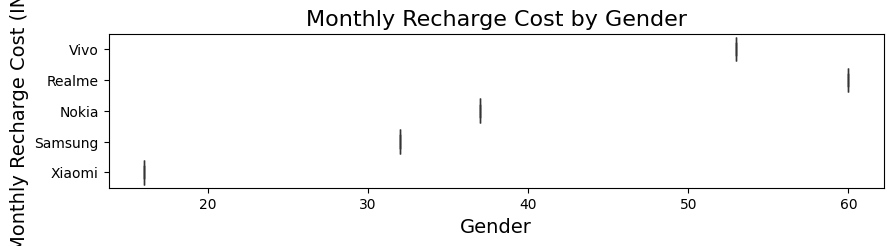

In [21]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x="Age", y="Phone Brand", palette="viridis")
plt.title("Monthly Recharge Cost by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Monthly Recharge Cost (INR)", fontsize=14)
plt.show()

In [30]:
print(df)

      User ID  Age  Gender   Location Phone Brand       OS  \
0      U00001   53    Male     Mumbai        Vivo  Android   
1      U00002   60   Other      Delhi      Realme      iOS   
2      U00003   37  Female  Ahmedabad       Nokia  Android   
3      U00004   32    Male       Pune     Samsung  Android   
4      U00005   16    Male     Mumbai      Xiaomi      iOS   
...       ...  ...     ...        ...         ...      ...   
17681  U17682   27   Other     Mumbai       Apple      iOS   
17682  U17683   40  Female    Chennai        Oppo      iOS   
17683  U17684   34  Female  Ahmedabad      Realme  Android   
17684  U17685   22    Male  Hyderabad        Vivo  Android   
17685  U17686   43   Other    Kolkata        Oppo      iOS   

       Screen Time (hrs/day)  Data Usage (GB/month)  \
0                        3.7                   23.9   
1                        9.2                   28.1   
2                        4.5                   12.3   
3                       11.0       

Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')


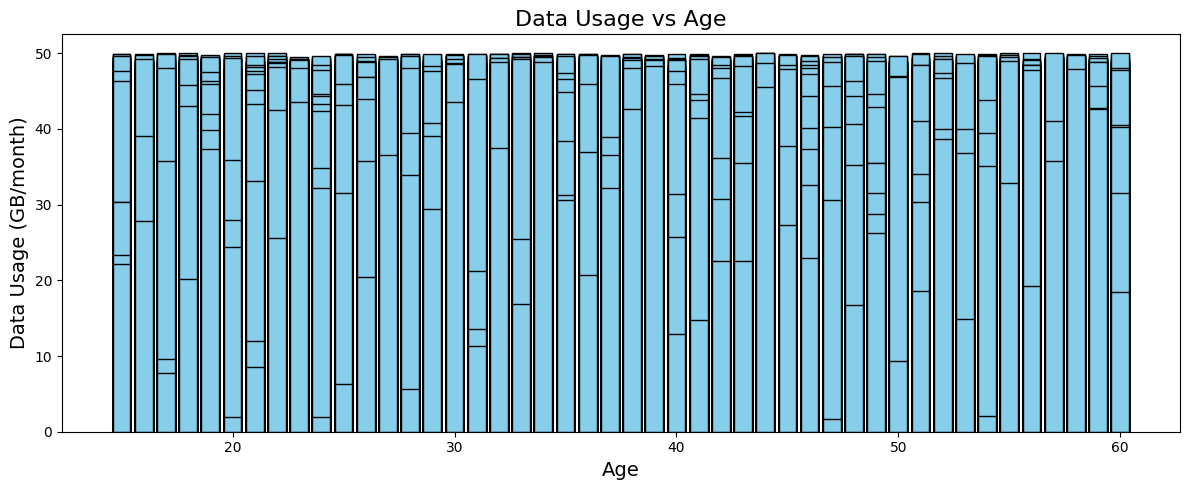

In [31]:
# Clean column names to remove extra spaces if needed
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)

# Plotting after verifying column names
plt.figure(figsize=(12, 5))
plt.bar(df["Age"], df["Data Usage (GB/month)"], color="skyblue", edgecolor="black")
plt.title("Data Usage vs Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Data Usage (GB/month)", fontsize=14)
plt.tight_layout()
plt.show()


Index(['User ID', 'Age', 'Gender', 'Location', 'Phone Brand', 'OS',
       'Screen Time (hrs/day)', 'Data Usage (GB/month)',
       'Calls Duration (mins/day)', 'Number of Apps Installed',
       'Social Media Time (hrs/day)', 'E-commerce Spend (INR/month)',
       'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)',
       'Monthly Recharge Cost (INR)', 'Primary Use'],
      dtype='object')


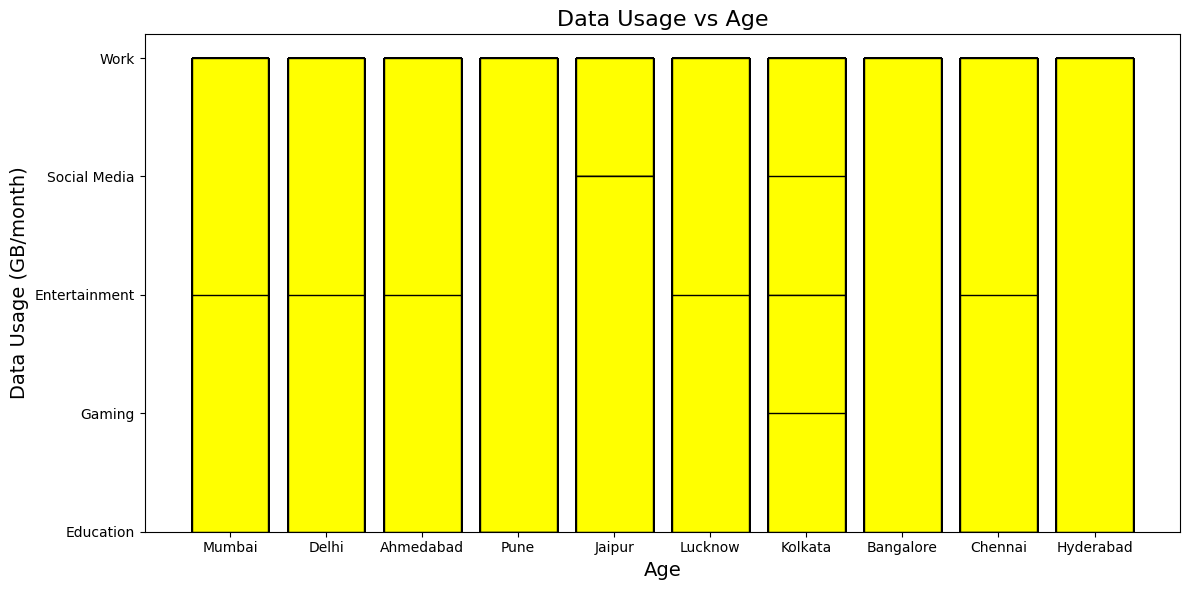

In [32]:
# Clean column names to remove extra spaces if needed
df.columns = df.columns.str.strip()

# Verify the column names
print(df.columns)

# Plotting after verifying column names
plt.figure(figsize=(12, 6))
plt.bar(df["Location"], df["Primary Use"], color="yellow", edgecolor="black")
plt.title("Data Usage vs Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Data Usage (GB/month)", fontsize=14)
plt.tight_layout()
plt.show()


In [29]:
print(df)

      User ID  Age  Gender   Location Phone Brand       OS  \
0      U00001   53    Male     Mumbai        Vivo  Android   
1      U00002   60   Other      Delhi      Realme      iOS   
2      U00003   37  Female  Ahmedabad       Nokia  Android   
3      U00004   32    Male       Pune     Samsung  Android   
4      U00005   16    Male     Mumbai      Xiaomi      iOS   
...       ...  ...     ...        ...         ...      ...   
17681  U17682   27   Other     Mumbai       Apple      iOS   
17682  U17683   40  Female    Chennai        Oppo      iOS   
17683  U17684   34  Female  Ahmedabad      Realme  Android   
17684  U17685   22    Male  Hyderabad        Vivo  Android   
17685  U17686   43   Other    Kolkata        Oppo      iOS   

       Screen Time (hrs/day)  Data Usage (GB/month)  \
0                        3.7                   23.9   
1                        9.2                   28.1   
2                        4.5                   12.3   
3                       11.0       

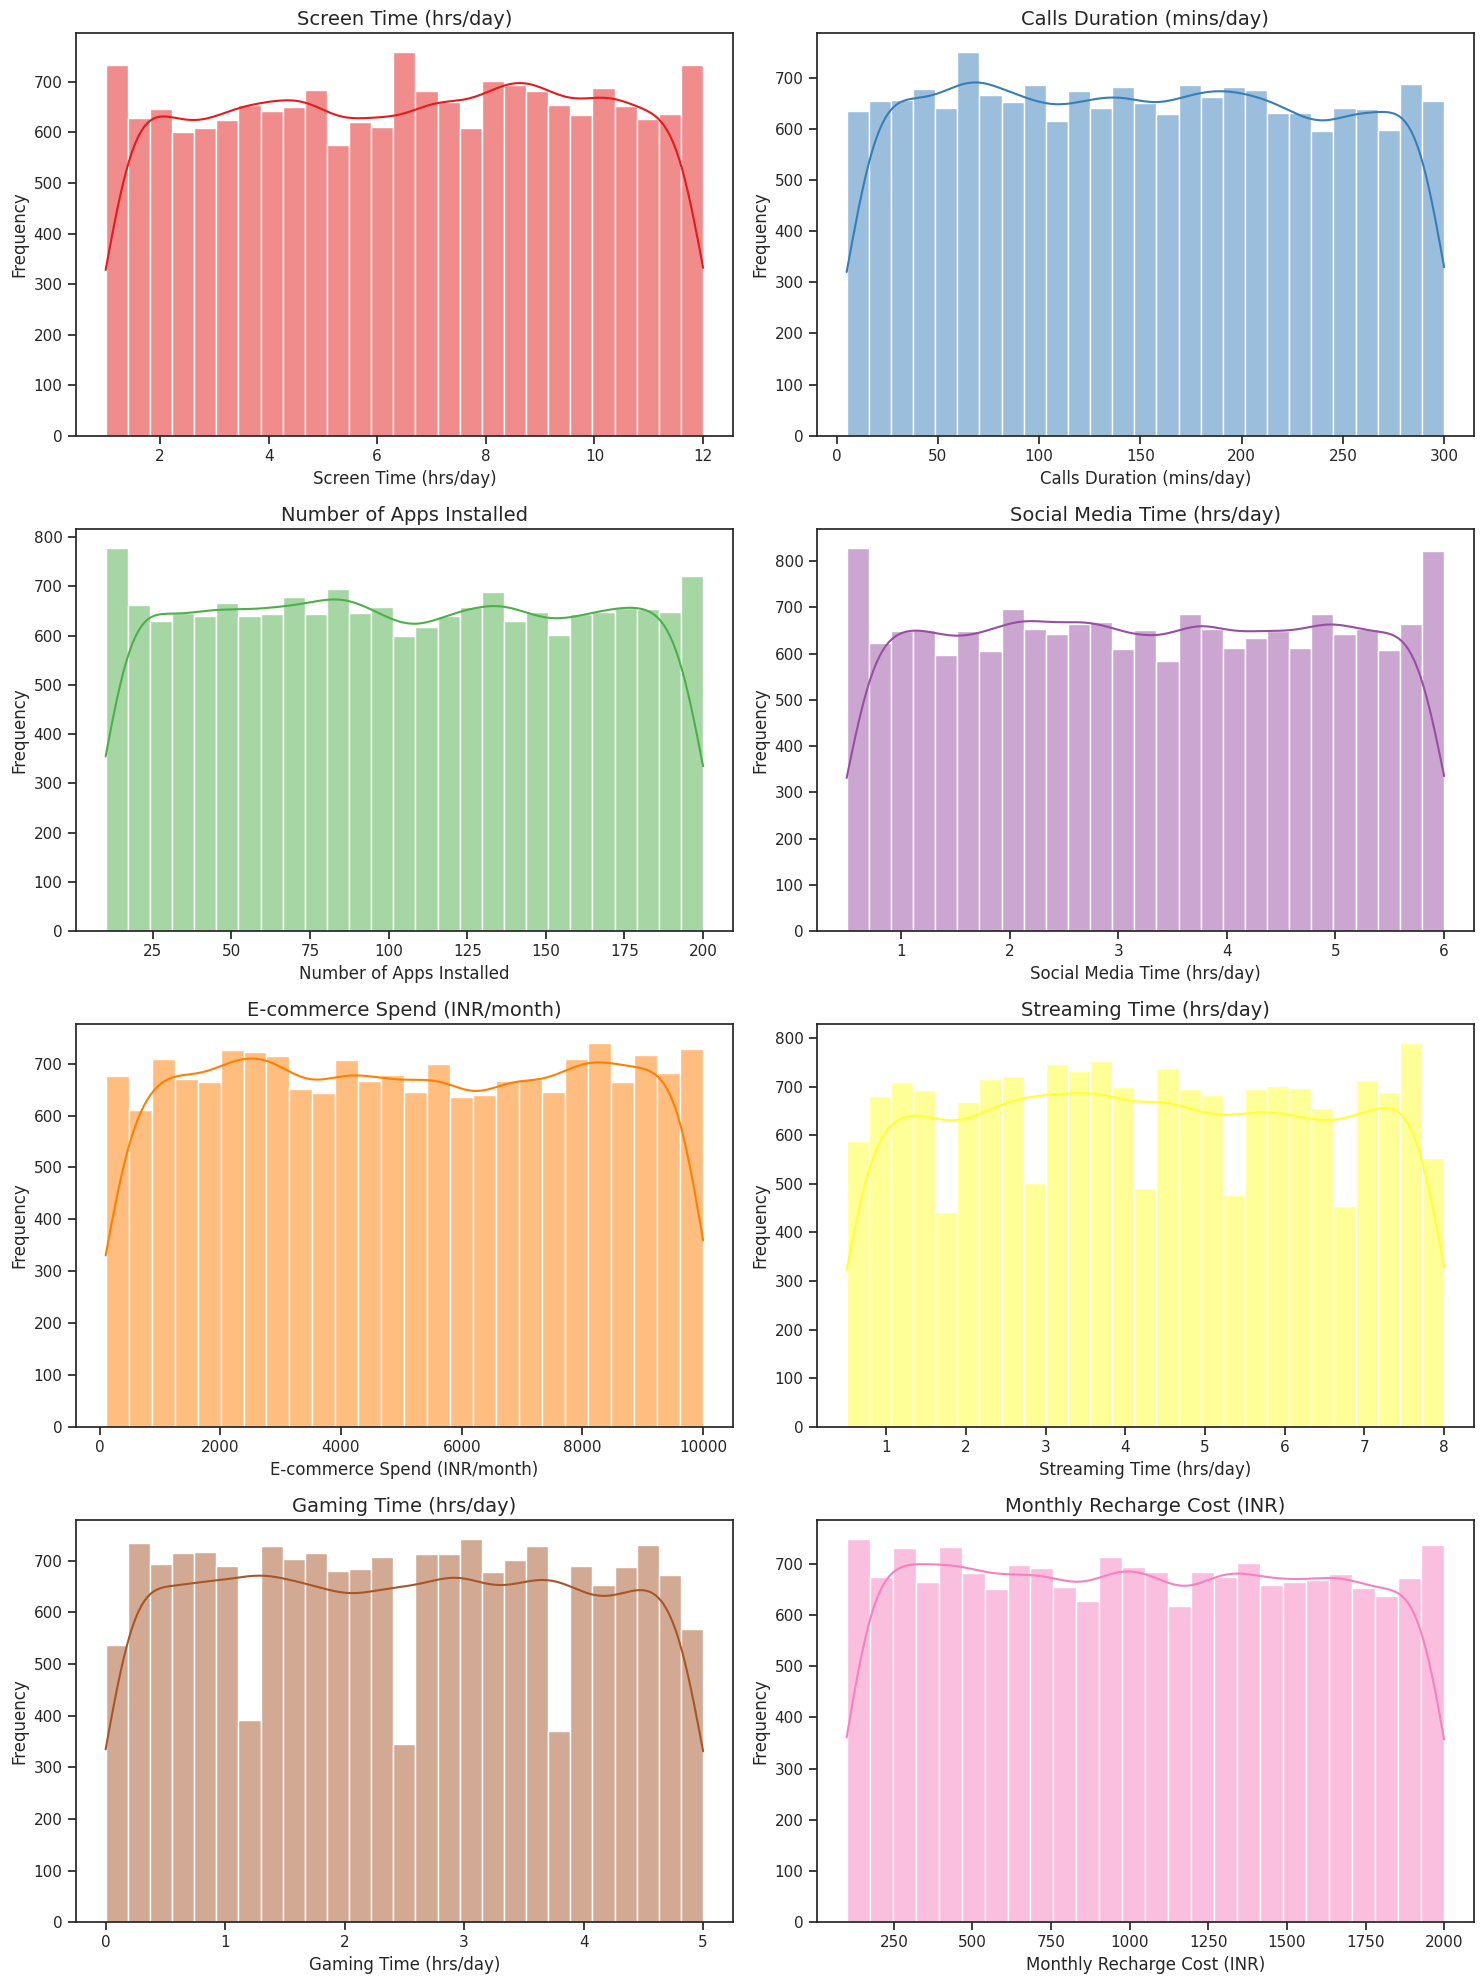

In [40]:
sns.set(style="ticks")

numeric_cols = [
    "Screen Time (hrs/day)",
    "Calls Duration (mins/day)", "Number of Apps Installed",
    "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set1", len(numeric_cols))[i], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

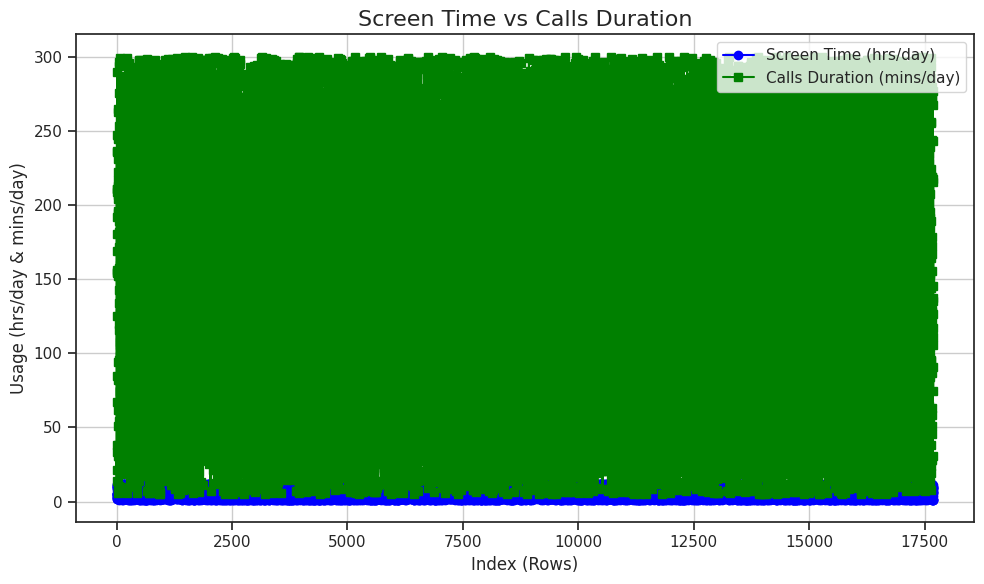

In [44]:
# Plot the line graph for the entire columns
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.plot(df.index, df["Screen Time (hrs/day)"], marker='o', label="Screen Time (hrs/day)", color='blue')
plt.plot(df.index, df["Calls Duration (mins/day)"], marker='s', label="Calls Duration (mins/day)", color='green')

# Add labels, title, legend, and grid
plt.title("Screen Time vs Calls Duration", fontsize=16)
plt.xlabel("Index (Rows)", fontsize=12)
plt.ylabel("Usage (hrs/day & mins/day)", fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


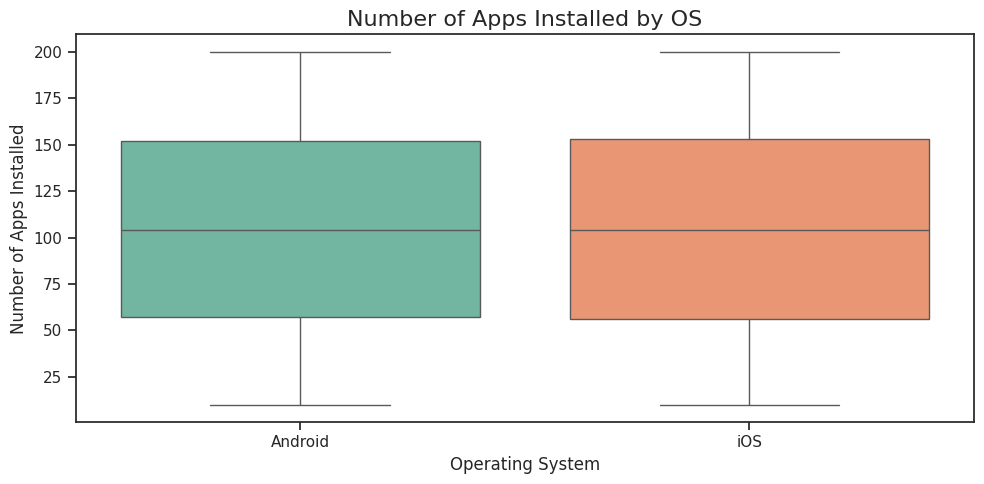

In [46]:
# Create a boxplot
plt.figure(figsize=(10, 5))  # Set the figure size
sns.boxplot(x="OS", y="Number of Apps Installed", data=df, palette="Set2")

# Add labels and title
plt.title("Number of Apps Installed by OS", fontsize=16)
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Number of Apps Installed", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


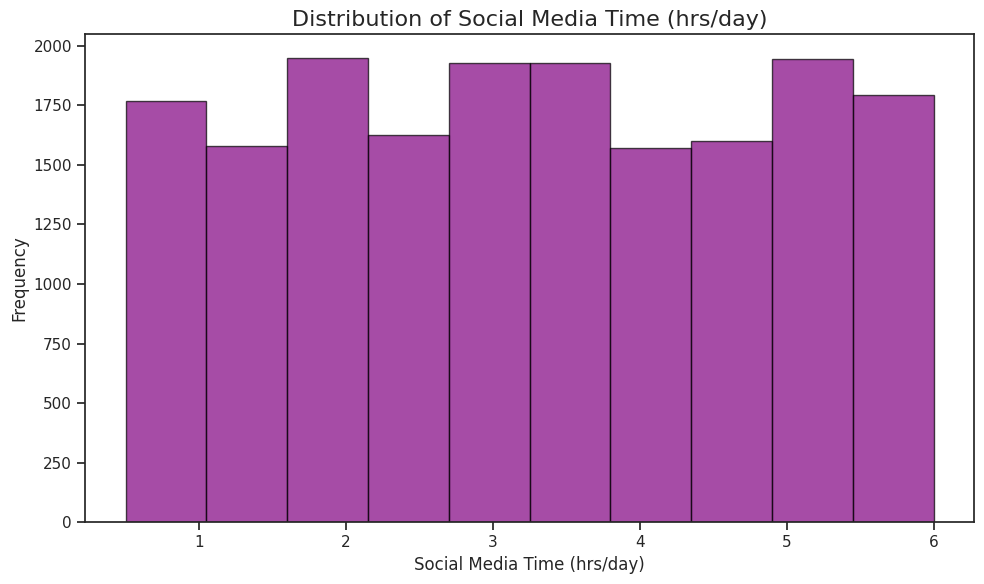

In [48]:
# Plot the histogram
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(df["Social Media Time (hrs/day)"], bins=10, color='purple', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title("Distribution of Social Media Time (hrs/day)", fontsize=16)
plt.xlabel("Social Media Time (hrs/day)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


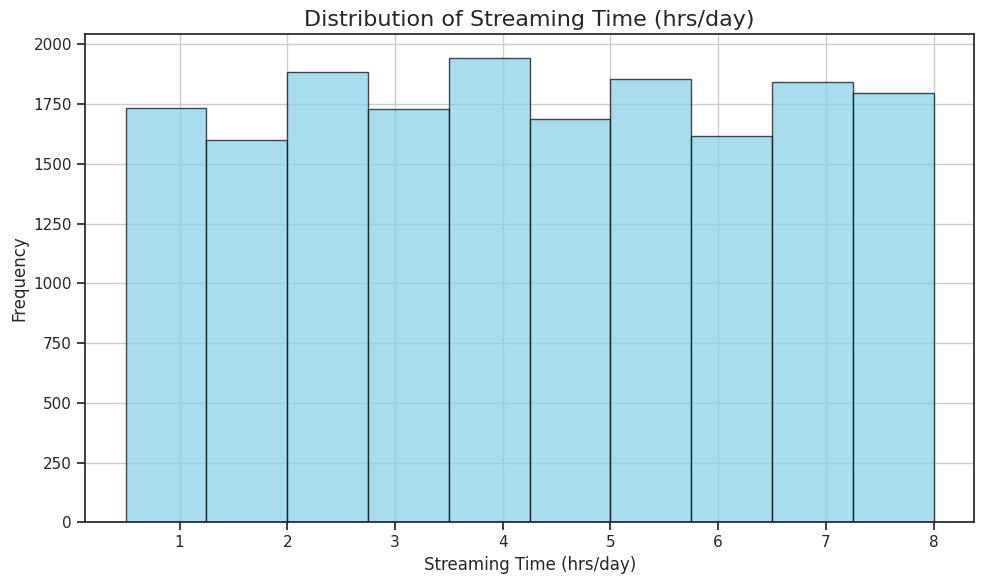

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(df["Streaming Time (hrs/day)"], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Streaming Time (hrs/day)", fontsize=16)
plt.xlabel("Streaming Time (hrs/day)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


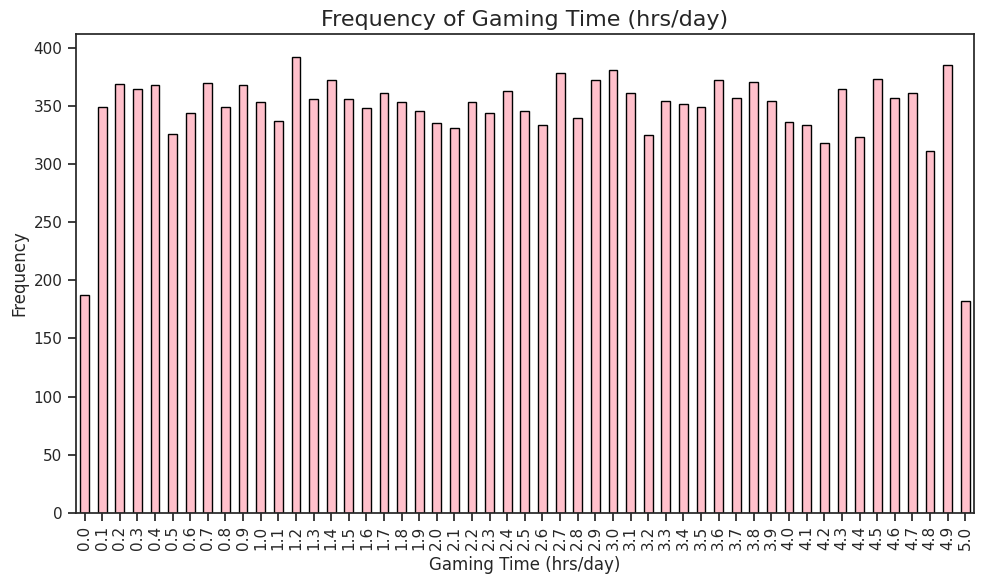

In [52]:
import matplotlib.pyplot as plt

# Plotting the bar graph for 'Gaming Time (hrs/day)' column
plt.figure(figsize=(10, 6))  # Set the figure size
df["Gaming Time (hrs/day)"].value_counts().sort_index().plot.bar(color='pink', edgecolor='black')

# Add labels and title
plt.title("Frequency of Gaming Time (hrs/day)", fontsize=16)
plt.xlabel("Gaming Time (hrs/day)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
# Frequency table for 'Primary Use' column
primary_use_freq = df["Primary Use"].value_counts()
print("Frequency Table for Primary Use:")
print(primary_use_freq)

# Frequency table for 'Age' column
age_freq = df["Age"].value_counts()
print("\nFrequency Table for Age:")
print(age_freq)


Frequency Table for Primary Use:
Primary Use
Education        3601
Gaming           3576
Work             3557
Social Media     3501
Entertainment    3451
Name: count, dtype: int64

Frequency Table for Age:
Age
58    438
54    423
19    418
36    411
46    410
50    407
47    403
22    402
40    401
16    400
28    397
52    397
24    396
15    396
48    392
41    390
35    390
59    390
21    388
57    387
30    386
25    385
56    385
51    383
37    379
39    378
49    378
55    377
23    376
34    375
31    375
53    375
44    375
33    374
26    371
20    370
17    368
32    367
45    366
29    365
27    365
60    359
18    359
42    356
38    356
43    347
Name: count, dtype: int64
